In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# sklearn
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# visualization
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
songs = pd.read_csv("data.csv")
songs = songs.iloc[0:25000,:]
songs

valence  year  acousticness  \
0       0.0594  1921         0.982   
1       0.9630  1921         0.732   
2       0.0394  1921         0.961   
3       0.1650  1921         0.967   
4       0.2530  1921         0.957   
...        ...   ...           ...   
24995   0.1720  1951         0.950   
24996   0.2740  1951         0.986   
24997   0.0540  1951         0.994   
24998   0.5380  1951         0.680   
24999   0.6230  1951         0.864   

                                                 artists  danceability  \
0      ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                         ['Dennis Day']         0.819   
2      ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                       ['Frank Parker']         0.275   
4                                         ['Phil Regan']         0.418   
...                                                  ...           ...   
24995  ['Doris Day', 'Paul Weston And His Orchestra',...         0.275   
24996                                ['Kathryn Grayson']         0.270   
24997        ['Alexander Scriabin', 'Vladimir Horowitz']         0.272   
24998                   ['Lester Flatt', 'Earl Scruggs']         0.633   
24999                                   ['Wynton Kelly']         0.514   

       duration_ms  energy  explicit                      id  \
0           831667  0.2110         0  4BJqT0PrAfrxzMOxytFOIz   
1           180533  0.3410         0  7xPhfUan2yNtyFG0cUWkt8   
2           500062  0.1660         0  1o6I8BglA6ylDMrIELygv1   
3           210000  0.3090         0  3ftBPsC5vPBKxYSee08FDH   
4           166693  0.1930         0  4d6HGyGT8e121BsdKmw9v6   
...            ...     ...       ...                     ...   
24995       157213  0.1290         0  6pl3Oq78A2KIyGx6o0upSQ   
24996       189227  0.0759         0  6tdblpOzCua9xJBLVgHNga   
24997       325453  0.2180         0  75nB8a1QStadJaGJm6H4Zm   
24998       138333  0.2120         0  7CZhyjk2lDW7A0lRsig45j   
24999       188760  0.5100         0  7DvMNdb2kACIW4mO3MUqa3   

       instrumentalness  key  liveness  loudness  mode  \
0              0.878000   10    0.6650   -20.096     1   
1              0.000000    7    0.1600   -12.441     1   
2              0.913000    3    0.1010   -14.850     1   
3              0.000028    5    0.3810    -9.316     1   
4              0.000002    3    0.2290   -10.096     1   
...                 ...  ...       ...       ...   ...   
24995          0.000062    1    0.0919   -14.318     1   
24996          0.008500   10    0.4520   -16.781     1   
24997          0.909000    6    0.0913   -17.146     1   
24998          0.000000   10    0.3760   -11.729     1   
24999          0.408000    3    0.2290   -12.623     1   

                                                    name  popularity  \
0      Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4   
1                                Clancy Lowered the Boom           5   
2                                              Gati Bali           5   
3                                              Danny Boy           3   
4                            When Irish Eyes Are Smiling           2   
...                                                  ...         ...   
24995  Till We Meet Again (with Paul Weston & His Orc...           7   
24996                                     After the Ball           6   
24997  Piano Sonata No. 3 in F-Sharp Minor, Op. 23: I...           8   
24998                      Where Will I Shelter My Sheep           4   
24999                                           Cherokee           9   

      release_date  speechiness    tempo  
0             1921       0.0366   80.954  
1             1921       0.4150   60.936  
2             1921       0.0339  110.339  
3             1921       0.0354  100.109  
4             1921       0.0380  101.665  
...            ...          ...      ...  
24995   1951-07-01       0.02

In [4]:
songs.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [5]:
songs.isnull().any()

valence             False
year                False
acousticness        False
artists             False
danceability        False
duration_ms         False
energy              False
explicit            False
id                  False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
name                False
popularity          False
release_date        False
speechiness         False
tempo               False
dtype: bool

In [6]:
# delete unique values
index_size = songs.values.shape[0]
reduced_dataset=songs
for c,column in enumerate(songs.columns):
    # fill empty string to non and delete 
    songs[column].replace('', np.nan, inplace=True)
    songs.dropna(subset=[column], inplace=True)
    # if number of unique and size of the column is same, delete the column
    if songs[column].unique().shape[0] == index_size:
        reduced_dataset=songs.drop(columns=[column])
        print("Unique feature '{}' is deleted.".format(column)) 
reduced_dataset.head()

Unique feature 'id' is deleted.


valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit  instrumentalness  key  liveness  loudness  \
0       831667   0.211         0          0.878000   10     0.665   -20.096   
1       180533   0.341         0          0.000000    7     0.160   -12.441   
2       500062   0.166         0          0.913000    3     0.101   -14.850   
3       210000   0.309         0          0.000028    5     0.381    -9.316   
4       166693   0.193         0          0.000002    3     0.229   -10.096   

   mode                                               name  popularity  \
0     1  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4   
1     1                            Clancy Lowered the Boom           5   
2     1                                          Gati Bali           5   
3     1                                          Danny Boy           3   
4     1                        When Irish Eyes Are Smiling           2   

  release_date  speechiness    tempo  
0         1921       0.0366   80.954  
1         1921       0.4150   60.936  
2         1921       0.0339  110.339  
3         1921       0.0354  100.109  
4         1921       0.0380  101.665

In [7]:
"""
id column was unique, therefore excluded from data
name artists ve release_date are categorical features. However, because there re so many different categories in it, one-hot 
encoding was not applied to these columns, instead they removed. release_date also removed for the same reason.
"""
# print(dataset["name"].unique().shape) # 133638
# print(dataset["artists"].unique().shape) #34088
# print(dataset["release_date"].unique().shape) # 11244
reduced_dataset=reduced_dataset.drop(columns=["name","artists", "release_date"])

In [8]:
reduced_dataset.values.shape

(25000, 15)

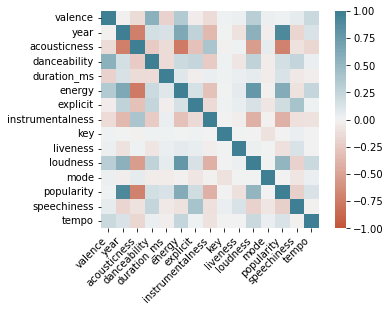

In [9]:
# plot the heatmap
corr = reduced_dataset.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
"""
Because there s high positive correlation between year and popularity , loudness and energy,also, negative correlation 
between energy and acousticness, acousticness and year, , acousticness and popularity; energy, acousticness and year is removed 
from data.
"""
corr_dataset=reduced_dataset.drop(columns=["energy","year", "acousticness"])
corr_columns = corr_dataset.columns
corr_dataset.head()

valence  danceability  duration_ms  explicit  instrumentalness  key  \
0   0.0594         0.279       831667         0          0.878000   10   
1   0.9630         0.819       180533         0          0.000000    7   
2   0.0394         0.328       500062         0          0.913000    3   
3   0.1650         0.275       210000         0          0.000028    5   
4   0.2530         0.418       166693         0          0.000002    3   

   liveness  loudness  mode  popularity  speechiness    tempo  
0     0.665   -20.096     1           4       0.0366   80.954  
1     0.160   -12.441     1           5       0.4150   60.936  
2     0.101   -14.850     1           5       0.0339  110.339  
3     0.381    -9.316     1           3       0.0354  100.109  
4     0.229   -10.096     1           2       0.0380  101.665

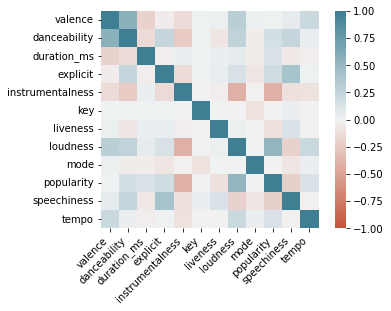

In [11]:
corr = corr_dataset.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
corr_dataset.shape

(25000, 12)

In [13]:
# normalize correlation matrix
corr_normalizer = Normalizer()
corr_dataset = corr_normalizer.fit_transform(corr_dataset)
corr_dataset.shape

(25000, 12)

In [14]:
n_components = 2

pca = PCA(n_components=n_components)
pca.fit(reduced_dataset)
pca_dataset = pca.transform(reduced_dataset)
pca_dataset = pd.DataFrame(pca_dataset)
total_var = pca.explained_variance_ratio_.sum() * 100


labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    pca_dataset,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',)
fig.update_traces(diagonal_visible=False)
fig.show()

In [14]:
# normalize correlation matrix
pca_normalizer = Normalizer()
pca_dataset = pca_normalizer.fit_transform(pca_dataset)
pca_dataset.shape

(25000, 2)

In [15]:
def findDifferentKinertias(dataset,max_k=10):
    
    inertias=[]
    ks= []
    labels_list=[]
    count_means_list = []
    for k in range(2,max_k):
        print("k:{}".format(k))
        labels, inertia, count_means = kMeansCluster(dataset,k)
        inertias.append(inertia)
        ks.append(k)
        labels_list.append(labels)
        count_means_list.append(count_means)
    return ks, inertias, labels_list, count_means_list

In [16]:
def distance(k1,p1,k2,p2):
    return np.sqrt(pow(k2-k1, 2) + pow(p2-p1, 2))

In [17]:
def optimalElbow(ks,inertias):
    initial_k = ks[0]
    final_k = ks[len(ks)-1]
    initial_inertia = inertias[0]
    final_inertia = inertias[len(inertias)-1]
    
    max_dist = 0
    optimal_k = 0
    for i,k in enumerate(ks):
        a = distance(k, inertias[i], final_k, final_inertia)
        b = distance(k, inertias[i], initial_k, initial_inertia)
        c = distance(initial_k, initial_inertia, final_k, final_inertia)
        h = np.sqrt(pow(b,2) - pow(((pow(c,2) + pow(b,2) - pow(a,2))/(2*c)),2))
        #print("a:{}, b:{}, c:{}, h:{}".format(a,b,c,h))
        if h > max_dist:
            max_dist = h
            optimal_k = k
    return optimal_k


In [18]:
# "The Elbow for Selection of Optimal 'K' Clusters"
def plotElbow(optimal_k,ks,inertias, title):
    plt.plot(ks, inertias,marker="o", color="red")
    ok = plt.plot(optimal_k, inertias[optimal_k-2], color='green',marker="o", markersize=10)
    plt.xlabel("K")
    plt.ylabel("WCSS")
    plt.title(title)

In [19]:
def kMeansCluster(dataset, n_cluster=2, max_iter=100):
    # convert pandas dataframe to numpy 
    if type(dataset) == pd.core.frame.DataFrame:
        dataset = dataset.values
    
    # dataset rows
    rows = dataset.shape[0]
    
    # dataset cols
    cols = dataset.shape[1]
    
    # select means randomly or first n_cluster of dataset
    #means = np.random.randint(low=0,high=(rows-1),size=(n_cluster, cols))
    means = np.zeros((n_cluster, cols))
    new_means = np.zeros((n_cluster, cols))
    
    # initialize means
    for i in range(n_cluster):
        means[i] = dataset[i]
        
    #print("means:{}".format(means))
    labels = np.zeros(rows)
    
    # while means change
    iter = 0
    while not (means == new_means).all() and iter < max_iter:
        inertia = 0
        iter+=1
        # labels means that clusters of samples 
        labels = np.zeros(rows)
        
        sum_means = np.zeros((n_cluster, cols))
        count_means = np.zeros(n_cluster)
        
        # distance between sample and its mean of cluster
        dist_means = np.zeros(n_cluster)
        
        # find labels
        for r in range(rows):
            min_dist = np.finfo('d').max
            for m,mean in enumerate(means):
                dist = np.sqrt(np.power(dataset[r]-mean,2).sum())
                
                # find closed cluster mean
                if( dist < min_dist):
                    min_dist = dist
                    labels[r] = m
            
            # sum of each cluster's samples   
            sum_means[int(labels[r])] += dataset[r]        
            
            # count of each cluster's samples
            count_means[int(labels[r])]+= 1
            
            # subset of WCSS
            dist_means[int(labels[r])] =dist_means[int(labels[r])] + np.power(dataset[r]-means[int(labels[r])],2).sum()
            
        # WCSS
        inertia = dist_means.sum()

        # update means
        means = np.copy(new_means)
        
        # calculate new_means
        for i in range(n_cluster):
            if count_means[i] !=0:
                new_means[i] = sum_means[i]/count_means[i]
        #print("new_means:{}".format(new_means))  
    return labels, inertia, count_means

k:2
k:3
k:4
k:5
k:6
k:7
k:8
k:9
k:10
k:11
k:12
k:13
count_means_list:[1896. 9779. 6080. 7117.  128.]
Wall time: 28min 39s


valence  danceability  duration_ms  explicit  instrumentalness  \
0  7.142282e-08  3.354708e-07          1.0       0.0      1.055711e-06   
1  5.334205e-06  4.536566e-06          1.0       0.0      0.000000e+00   
2  7.879023e-08  6.559186e-07          1.0       0.0      1.825774e-06   
3  7.857142e-07  1.309524e-06          1.0       0.0      1.319047e-10   
4  1.517760e-06  2.507603e-06          1.0       0.0      1.007841e-11   

        key      liveness  loudness      mode  popularity   speechiness  \
0  0.000012  7.995989e-07 -0.000024  0.000001    0.000005  4.400800e-08   
1  0.000039  8.862645e-07 -0.000069  0.000006    0.000028  2.298749e-06   
2  0.000006  2.019750e-07 -0.000030  0.000002    0.000010  6.779159e-08   
3  0.000024  1.814286e-06 -0.000044  0.000005    0.000014  1.685714e-07   
4  0.000018  1.373783e-06 -0.000061  0.000006    0.000012  2.279639e-07   

      tempo  label  
0  0.000097    1.0  
1  0.000338    1.0  
2  0.000221    1.0  
3  0.000477    1.0  
4  0.000610    2.0

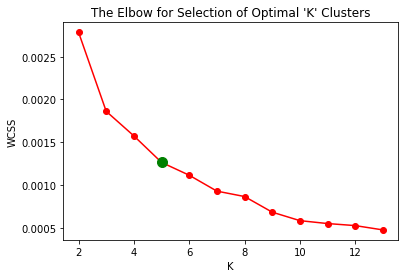

In [20]:
%%time
# corr_dataset result
ks, inertias, labels_list,count_means_list = findDifferentKinertias(corr_dataset,14)
optimal_k = optimalElbow(ks, inertias)
title = "The Elbow for Selection of Optimal 'K' Clusters"
plotElbow(optimal_k,ks,inertias, title)

print("count_means_list:{}".format(count_means_list[optimal_k-2]))

corr_dataset = pd.DataFrame(corr_dataset,columns = corr_columns)
corr_dataset["label"]=labels_list[optimal_k-2]
corr_dataset.head()

k:2
k:3
k:4
k:5
k:6
k:7
k:8
k:9
k:10
k:11
k:12
k:13
count_means_list:[7.0000e+00 1.5985e+04 8.9950e+03 1.0000e+00 1.2000e+01]
Wall time: 22min 53s


0         1  label
0  1.000000  0.000143    2.0
1 -0.999999  0.001624    1.0
2  1.000000  0.000227    2.0
3 -0.999980  0.006401    1.0
4 -0.999999  0.001018    1.0

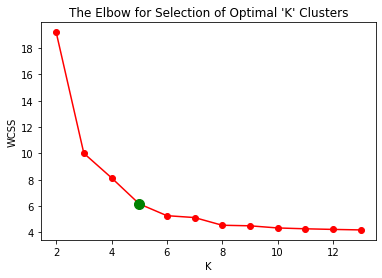

In [21]:
%%time
# pca_dataset result
ks, inertias, labels_list, count_means_list = findDifferentKinertias(pca_dataset,14)
optimal_k = optimalElbow(ks, inertias)
title = "The Elbow for Selection of Optimal 'K' Clusters"
plotElbow(optimal_k,ks,inertias, title)

print("count_means_list:{}".format(count_means_list[optimal_k-2]))

pca_dataset = pd.DataFrame(pca_dataset)
pca_dataset["label"]=labels_list[optimal_k-2]
pca_dataset.head()

In [28]:
def plotDataset(dataset):
    x = dataset.iloc[:, 0:dataset.values.shape[1]-1].values

    # Separating out the target
    y = dataset.loc[:,['label']].values

    pca = PCA(n_components=2)

    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])

    finalDf = pd.concat([principalDf, dataset[['label']]], axis = 1)

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('1. Dim', fontsize = 15)
    ax.set_ylabel('2. Dim', fontsize = 15)
    ax.set_title('Spotify Data Set', fontsize = 20)
    targets = np.unique(finalDf['label'].values)

    cmaps = ['r','g','b','c','m','y','lime','orange','tomato']

    colors = []
    for i in range(len(targets)):
        colors.append(cmaps[i])
    print("colors:{}".format(colors))

    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['label'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

colors:['r', 'g', 'b', 'c', 'm']


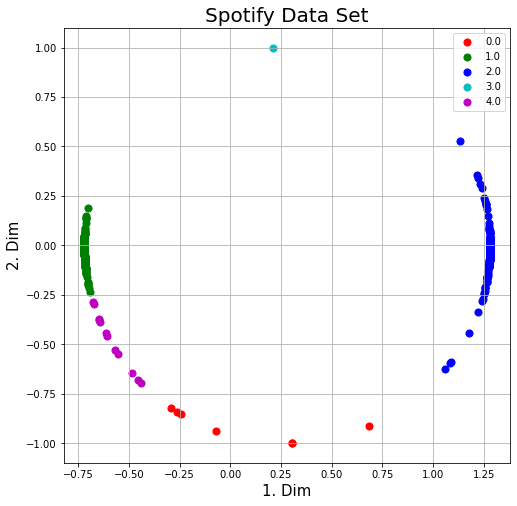

In [29]:
plotDataset(pca_dataset)

colors:['r', 'g', 'b', 'c', 'm']


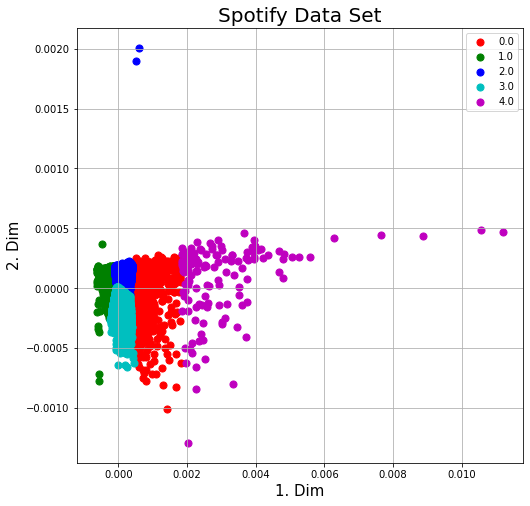

In [30]:
plotDataset(corr_dataset)